In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("../") # go to parent dir

%load_ext autoreload
%autoreload 2

from src.data import DataSet
from src.features.preprocessing import TitanicPreProcessing

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
input_train = '/home/matteo@COPPET/Documents/data_science/Kaggle/titanic/data/raw/train.csv'
input_test = '/home/matteo@COPPET/Documents/data_science/Kaggle/titanic/data/raw/test.csv'

raw_data = DataSet(input_train, input_test)

df_train = raw_data.get_train_set()
df_test = raw_data.get_test_set()

In [39]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can see that the data is not particularly skewed even though only a minority (38%) survived the tragedy.

In [19]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Emanuel, Miss. Virginia Ethel",male,347082,G6,S
freq,1,577,7,4,644


In [20]:
df_train[['Pclass', 'Survived']].groupby('Pclass').mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [21]:
df_train[['Sex', 'Survived']].groupby('Sex').mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [22]:
df_train[['SibSp', 'Survived']].groupby('SibSp').mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [23]:
df_train[['Parch', 'Survived']].groupby('Parch').mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


### Visualization

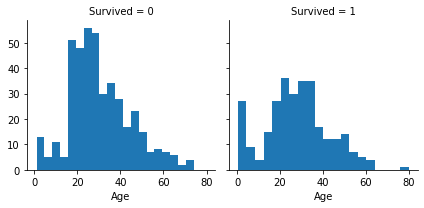

In [24]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/home/matteo@COPPET/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


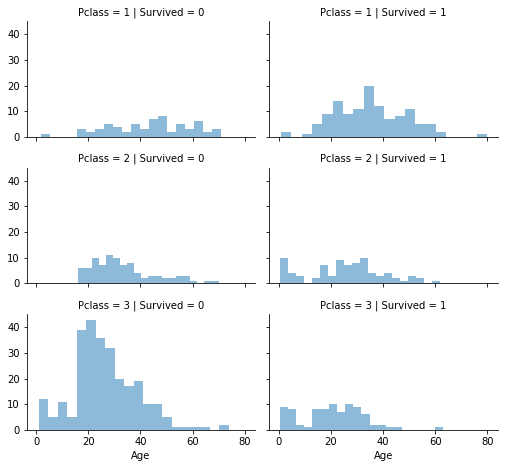

In [25]:
g = sns.FacetGrid(df_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
g.map(plt.hist, 'Age', alpha=.5, bins=20)
g.add_legend();

/home/matteo@COPPET/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/matteo@COPPET/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


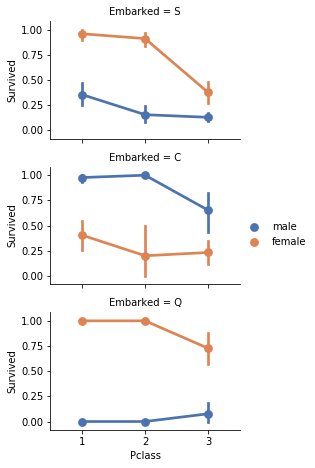

In [26]:
g = sns.FacetGrid(df_train, row='Embarked', size=2.2, aspect=1.6)
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
g.add_legend()

/home/matteo@COPPET/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/matteo@COPPET/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


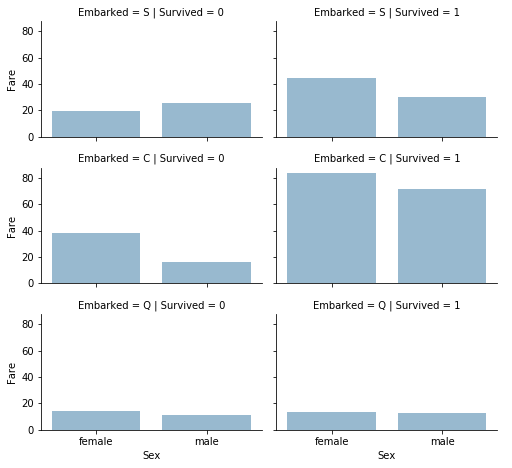

In [27]:
grid = sns.FacetGrid(df_train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

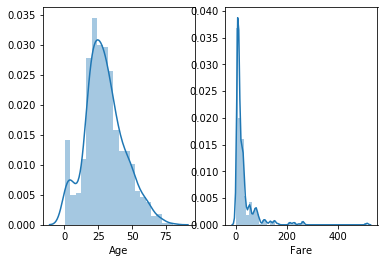

In [28]:
# distribution of num. data
fig, (ax1, ax2) = plt.subplots(1,2)

sns.distplot(df_train['Age'], ax=ax1)
sns.distplot(df_train['Fare'], ax=ax2)

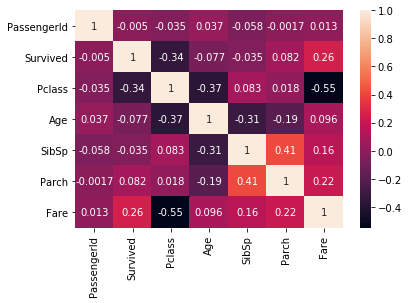

In [29]:
sns.heatmap(df_train.corr(), annot=True)

### Pre-processing

In [44]:
output_train = '/home/matteo@COPPET/Documents/data_science/Kaggle/titanic/data/processed/train.csv'
output_test = '/home/matteo@COPPET/Documents/data_science/Kaggle/titanic/data/processed/test.csv'

TitanicPreProcessing(df_train, output_train)
TitanicPreProcessing(df_test, output_test)

clean_data = DataSet(output_train, output_test)

df_train = clean_data.get_train_set()
df_test = clean_data.get_test_set()

In [45]:
df_train.head()

,PassengerId,Survived,Pclass,IsAlone,AgeBand,FareBand,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,1,0,0,0,1,0,0,0,1,0,0,1
1,2,1,1,0,2,3,0,0,0,1,0,1,0,1,0,0
2,3,1,3,1,1,1,0,1,0,0,0,1,0,0,0,1
3,4,1,1,0,2,3,0,0,0,1,0,1,0,0,0,1
4,5,0,3,1,2,1,0,0,1,0,0,0,1,0,0,1


In [46]:
df_test.head()

,PassengerId,Pclass,IsAlone,AgeBand,FareBand,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,2,0,0,0,1,0,0,0,1,0,1,0
1,893,3,0,3,0,0,0,0,1,0,1,0,0,0,1
2,894,2,1,4,1,0,0,1,0,0,0,1,0,1,0
3,895,3,1,1,1,0,0,1,0,0,0,1,0,0,1
4,896,3,0,1,1,0,0,0,1,0,1,0,0,0,1
